In [3165]:
# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import seaborn as sns
import json

# matplotlib 그래프에 한글 깨지지 않고 출력 
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [3166]:
# Min-Max scaling 함수

def min_max_scaling(dataframe, col, feature_range=(0, 1)):
    """
    Perform Min-Max scaling on specified column of a DataFrame.

    Parameters:
    - dataframe: The input DataFrame.
    - feature_range: A tuple specifying the desired scaling range (default is 0 to 1).
    - col: str, column name which want to perform scaling
    Returns:
    - scaled_dataframe: A new DataFrame with scaled values.
    """
    # Copy the input DataFrame to avoid modifying the original data
    scaled_dataframe = dataframe.copy()

    # Calculate the minimum and maximum values for each column
    min_vals = dataframe[col].min()
    max_vals = dataframe[col].max()

    # Calculate the feature range
    min_val, max_val = feature_range

    # Perform scaling for each column
    scaled_dataframe[col] = (dataframe[col] - min_vals) / (max_vals - min_vals) * (max_val - min_val) + min_val

    return scaled_dataframe[col]

In [3167]:
# read csv

policy = pd.read_csv('policy_scaled.csv', encoding='utf-8', index_col=0)
wealth = pd.read_csv('wealth.csv', encoding='utf-8', index_col=0)
live = pd.read_csv('도시특성가중치.csv', encoding='utf-8')
edu = pd.read_csv('교육_가중치 부여.csv', encoding='utf-8', index_col=0)
safe = pd.read_csv('안전_update.csv', encoding='utf-8', index_col=0)
foreign = pd.read_csv('외국인비율scaled.csv', encoding='utf-8')
life = pd.read_csv('물리적_요소_update_2.csv', encoding='utf-8', index_col=0)
city = pd.read_csv('도시_allcol 가중치 부여.csv', encoding='utf-8')
kids = pd.read_csv('kids.csv', encoding='utf-8', index_col=0)

In [3168]:
kids[kids['구별']=='강서구']

,구별,동별,kids
259,강서구,염창동,0.147531
260,강서구,등촌1동,0.071587
261,강서구,등촌2동,0.090973
262,강서구,등촌3동,0.078805
263,강서구,화곡본동,0.087596
264,강서구,화곡2동,0.093972
265,강서구,화곡3동,0.087705
266,강서구,화곡4동,0.080111
267,강서구,화곡6동,0.071639
268,강서구,화곡8동,0.074367


In [3169]:
police = pd.read_csv('자치구별 경찰서 수_22년 구별.csv', encoding='utf-8')
cctv = pd.read_csv('자치구별 방범용 cctv 수_23년 누적 구별.csv', encoding='utf-8', index_col=0)

police = police[['자치구별', '구별 면적(km²)']]
police.columns = ['구분', '구별면적']

cctv['총계'] = cctv['총계'].str.replace(',', '')
cctv = cctv.replace('중 구', '중구')
cctv= cctv.merge(police, on='구분', how='left')
cctv = cctv.astype({'총계': int})

cctv['cctv'] = cctv['총계'] / cctv['구별면적']
cctv['cctv'] = min_max_scaling(cctv, 'cctv')
cctv = cctv[['구분', 'cctv']]
cctv.columns = ['구', 'cctv']

In [3170]:
crime = pd.read_csv('5대범죄발생현황.csv', encoding='utf-8', index_col=0)
crime = crime.iloc[3:, 0:2]
crime.reset_index(drop=True, inplace=True)
crime.columns = ['구', 'crime']
crime = crime.astype({'crime':int})
crime['crime'] = min_max_scaling(crime, 'crime')
crime['crime'] = 1-crime['crime']

safe= safe.merge(crime, on='구', how='left')
safe= safe.merge(cctv, on='구', how='left')
safe['m2_per_police_office'] = 1-safe['m2_per_police_office']
safe['avg'] = (safe['m2_per_police_office'] + safe['crime'])/2

#### Dataframe 전처리
###### 일원2동 -> 개포3동, 상일동 -> 상일1동, 상일2동 / 둔촌1동 drop

In [3171]:
kids['kids'] = min_max_scaling(kids, 'kids')
region = kids[['구별', '동별']]

kids = kids[kids['동별']!='둔촌1동']
region = region[region['동별']!='둔촌1동']

In [3172]:
safe = safe[['구', '동', 'avg']]
safe['avg'] = min_max_scaling(safe, 'avg')
safe.columns = ['구별', '동별', 'safe']
safe = safe[safe['동별']!='둔촌1동']

In [3173]:
life = life[['구', '동', 'avg']]
life['avg'] = min_max_scaling(life, 'avg')
life.columns = ['구별', '동별', 'life']
life = life[life['동별']!='둔촌1동']

In [3174]:
live = live[['구별', '동별', '도시특성값_scaled']]
live.columns = ['구별', '동별', 'live']
live = live[live['동별']!='둔촌1동']

In [3175]:
wealth.columns = ['구별', '동별', 'wealth']
wealth = wealth[wealth['동별']!='둔촌1동']

In [3176]:
edu = edu[['구', '동', 'w_edu_scaled']]
edu.columns = ['구별', '동별', 'edu']
edu = edu[edu['동별']!='둔촌1동']

In [3177]:
foreign = foreign[['구별', '동별', '외국인 비율_scaled']]
foreign.columns = ['구별', '동별', 'foreign']
foreign = foreign[foreign['동별']!='둔촌1동']

In [3178]:
city = city[['구', '동', 'w_city_scaled']]
city.columns = ['구별', '동별', 'city']
city = city[city['동별']!='둔촌1동']

In [3179]:
policy = policy[policy['동별']!='둔촌1동']

In [3180]:
print(set(live['동별'].unique()) - set(kids['동별'].unique()))
print(set(kids['동별'].unique()) - set(live['동별'].unique()))

{'일원2동', '상일동'}
{'개포3동', '상일2동', '상일1동'}


In [3181]:
live = live.replace('일원2동', '개포3동')
live = live.replace('상일동', '상일1동')

In [3182]:
live.loc[425] = ['강동구', '상일2동', 0.829232]

In [3183]:
# '구_동' 형식의 '행정구역' column 생성 및 기존 '구별', '동별' column drop

policy['행정구역'] = policy['구별'] + '_' + policy['동별']
live['행정구역'] = live['구별'] + '_' + live['동별']
life['행정구역'] = life['구별'] + '_' + life['동별']
wealth['행정구역'] = wealth['구별'] + '_' + wealth['동별']
city['행정구역'] = city['구별'] + '_' + city['동별']
edu['행정구역'] = edu['구별'] + '_' + edu['동별']
safe['행정구역'] = safe['구별'] + '_' + safe['동별']
foreign['행정구역'] = foreign['구별'] + '_' + foreign['동별']
kids['행정구역'] = kids['구별'] + '_' + kids['동별']


kids = kids.drop(['구별','동별'], axis=1)
policy = policy.drop(['구별','동별'], axis=1)
live = live.drop(['구별','동별'], axis=1)
life = life.drop(['구별','동별'], axis=1)
wealth = wealth.drop(['구별','동별'], axis=1)
city = city.drop(['구별','동별'], axis=1)
edu = edu.drop(['구별','동별'], axis=1)
safe = safe.drop(['구별','동별'], axis=1)
foreign = foreign.drop(['구별','동별'], axis=1)

In [3184]:
# df merge

kids = kids.merge(policy, on='행정구역', how='left')
kids = kids.merge(live, on='행정구역', how='left')
kids = kids.merge(life, on='행정구역', how='left')
kids = kids.merge(wealth, on='행정구역', how='left')
kids = kids.merge(city, on='행정구역', how='left')
kids = kids.merge(edu, on='행정구역', how='left')
kids = kids.merge(safe, on='행정구역', how='left')
# kids = kids.merge(foreign, on='행정구역', how='left')

In [3185]:
# 신사동이 강남구, 관악구에 각각 존재하여 구 column이 없었던 life와 safe에서 행 복제 발생

kids[kids['행정구역'].duplicated()]

,kids,행정구역,policy,live,life,wealth,city,edu,safe


In [3186]:
# # 중복 rows drop

# kids = kids.drop([330, 331, 332, 361, 362, 363], axis=0)

kids.set_index('행정구역', inplace=True)

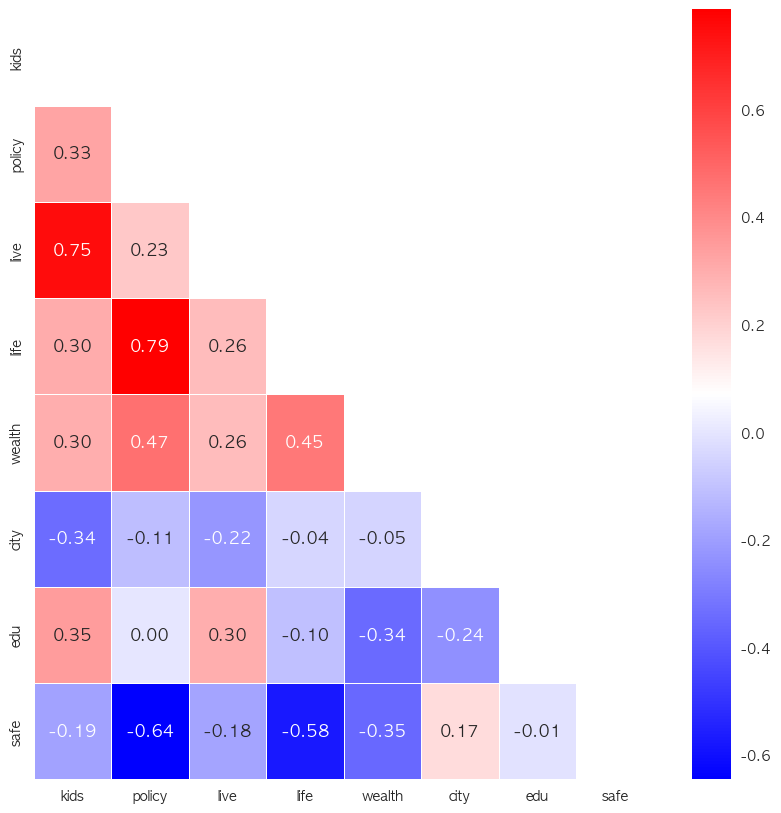

In [3188]:
# feature들 간의 상관관계 heatmap
mask = np.triu(np.ones_like(kids.corr(), dtype=np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(data = kids.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='bwr', mask=mask)
plt.show()

In [3050]:
# 아동비율 순으로 df 정렬

kids = kids.sort_values('kids', ascending=False)

##### 전체 데이터 대상 클러스터링

In [3051]:
# library import 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2990]:
# df copy

kids_all = kids.copy()

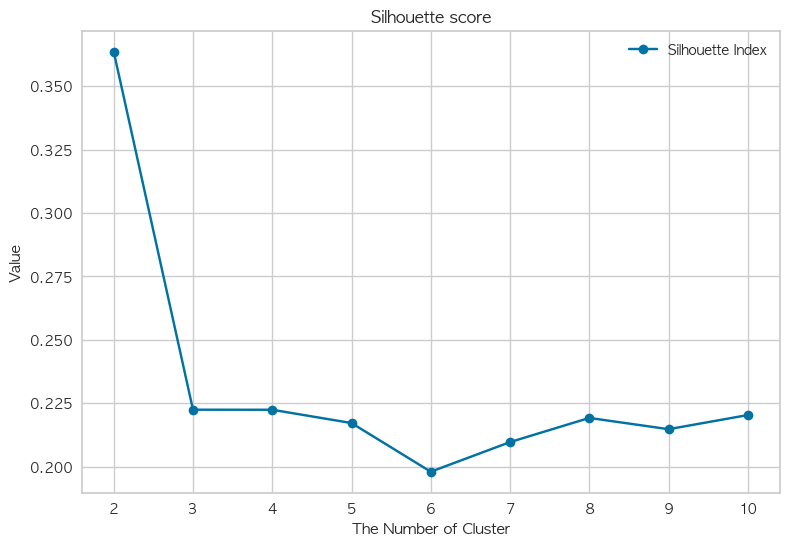

In [2991]:
# Silhouette score

cluster_num_candidates = range(2,11)
silhouette_list = []
for k in cluster_num_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    pred = kmeans.fit_predict(kids_all)
    silhouette_list.append(np.mean(silhouette_samples(kids_all, pred, metric='euclidean')))
    
    
fig = plt.figure(figsize=(9,6))
fig.set_facecolor('white')
 
plt.plot(cluster_num_candidates, silhouette_list, marker='o', label='Silhouette Index')
 
plt.legend()
plt.title('Silhouette score')
plt.xlabel('The Number of Cluster')
plt.ylabel('Value')
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

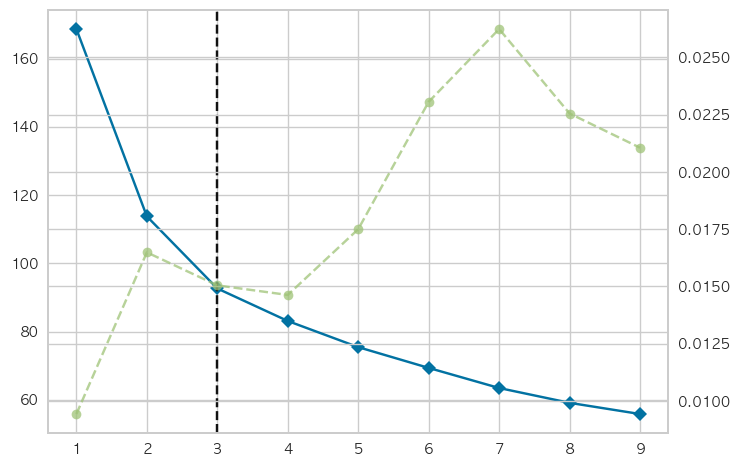

In [2992]:
# Elbow method

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(kids_all)

In [2993]:
# 모델 만들기
model = KMeans(n_clusters = 4, random_state = 10, init='k-means++')

# 모델 학습
model.fit(kids_all)

# 기존 데이터에 클러스터 생성
kids_all['cluster'] = model.fit_predict(kids_all)

In [2994]:
# 시각화를 위한 PCA 진행

pca = PCA(n_components = 2)
pca.fit(kids_all.iloc[:,:-1])
data = pd.DataFrame(data = pca.transform(kids_all.iloc[:,:-1]), columns=['pc1', 'pc2'])
data.index = kids_all.index
data['cluster'] = kids_all['cluster']

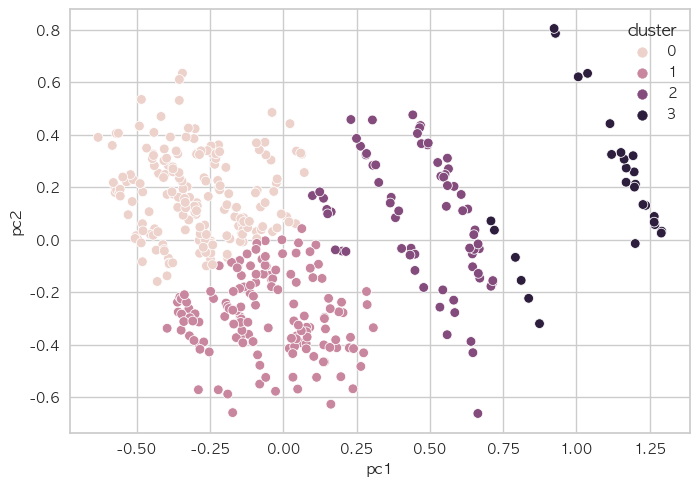

In [2995]:
# scatter plot으로 cluster 확인

sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=data)
plt.show()

In [2996]:
# 클러스터 별 데이터 개수 확인

kids_all.groupby('cluster').size()

cluster
0    185
1    144
2     68
3     28
dtype: int64

##### 상위 100개 행, 하위 100개 행 대상 클러스터링 진행

In [3052]:
# df 슬라이싱

kids_rev = pd.concat([kids[:100], kids[-100:]])

In [2998]:
# kids_rev = kids_rev.drop(['kids', 'foreign'], axis=1)

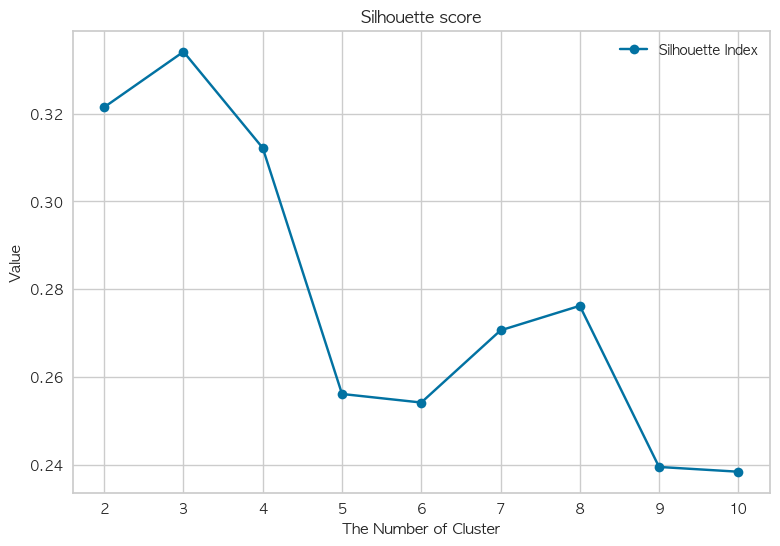

In [2999]:
# Silhouette score

cluster_num_candidates = range(2,11)
silhouette_list = []
for k in cluster_num_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    pred = kmeans.fit_predict(kids_rev)
    silhouette_list.append(np.mean(silhouette_samples(kids_rev, pred, metric='euclidean')))
    
    
fig = plt.figure(figsize=(9,6))
fig.set_facecolor('white')
 
plt.plot(cluster_num_candidates, silhouette_list, marker='o', label='Silhouette Index')
 
plt.legend()
plt.title('Silhouette score')
plt.xlabel('The Number of Cluster')
plt.ylabel('Value')
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

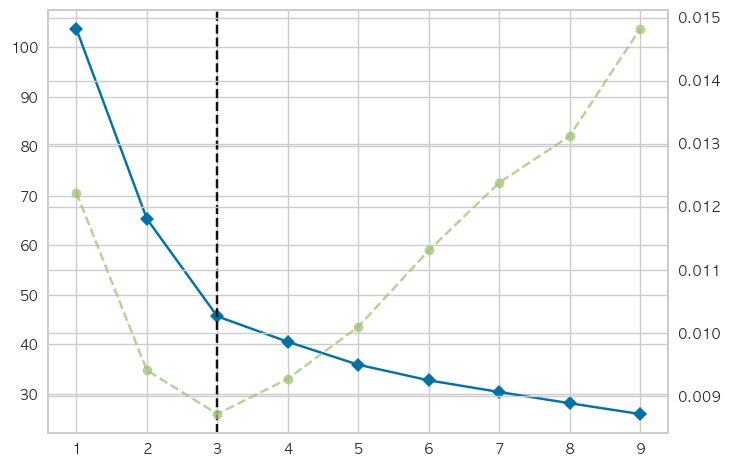

In [3000]:
# Elbow method

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(kids_rev)

In [3001]:
# 모델 만들기
model = KMeans(n_clusters = 4, random_state = 10, init='k-means++')

# 모델 학습
model.fit(kids_rev)

# 기존 데이터에 클러스터 생성
kids_rev['cluster'] = model.fit_predict(kids_rev)

In [3002]:
# 시각화를 위한 PCA 진행

pca = PCA(n_components = 2)
pca.fit(kids_rev.iloc[:,:-1])
data = pd.DataFrame(data = pca.transform(kids_rev.iloc[:,:-1]), columns=['pc1', 'pc2'])
data.index = kids_rev.index
data['cluster'] = kids_rev['cluster']

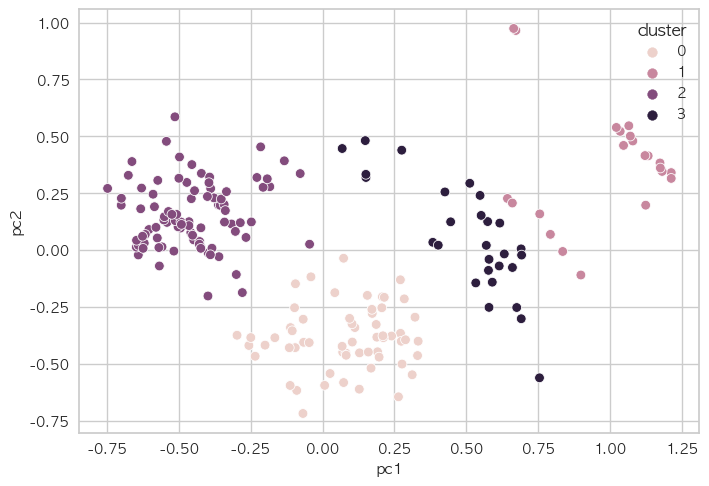

In [3003]:
# scatter plot으로 cluster 확인

sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=data)
plt.show()

In [3004]:
# # pca lambda 값 기준 outlier 찾기 -> '강남구_역삼1동', '강남구_논현1동'

# pca.components_

# kids_copy['kids'] = kids_copy['kids']*(-0.24669826)
# kids_copy['policy'] = kids_copy['policy']*0.59178936
# kids_copy['live'] = kids_copy['live']*(-0.06690882)
# kids_copy['life'] = kids_copy['life']*0.41238922
# kids_copy['wealth'] = kids_copy['wealth']*0.47709301
# kids_copy['city'] = kids_copy['city']*0.17400046
# kids_copy['edu'] = kids_copy['edu']*(-0.32382411)
# kids_copy['safe'] = kids_copy['safe']*0.22082613
# kids_copy['foreign'] = kids_copy['foreign']*0.05351195

# kids_copy.drop('cluster', axis=1, inplace=True)

# np.sum(kids_copy, axis=1).sort_values(ascending=False)

In [3005]:
# 클러스터 별 데이터 개수 확인

kids_rev.groupby('cluster').size()

cluster
0    61
1    22
2    89
3    28
dtype: int64

In [3006]:
# feature importance

from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(
	n_clusters=4,
	ordered_feature_names=kids_rev.columns[:-1].tolist(), 
	feature_importance_method='wcss_min', # or 'unsup2sup' 'wcss_min'
).fit(kids_rev.iloc[:,:-1])

kms.feature_importances_[0]

[('safe', 0.7329833779500925),
 ('city', 0.3753324367289802),
 ('edu', 0.3615921751848732),
 ('live', 0.26859030684637963),
 ('life', 0.2188156288539369),
 ('wealth', 0.2114394907834745),
 ('foreign', 0.20954362540729451),
 ('policy', 0.18234668295913325),
 ('kids', 0.15880750893398451)]

In [3007]:
kids_rev[kids_rev['cluster']==3]

,kids,policy,live,life,wealth,city,edu,safe,foreign,cluster
행정구역,,,,,,,,,,
송파구_위례동,1.000000,0.483804,1.000000,0.634178,0.419510,0.102772,0.959900,0.381473,0.005858,3
송파구_잠실2동,0.807119,0.483804,0.954282,0.634178,0.527806,0.037977,0.538080,0.381473,0.006759,3
송파구_잠실4동,0.784870,0.483804,0.950109,0.634178,0.540187,0.085297,0.473643,0.381473,0.006023,3
서초구_서초4동,0.662605,0.679419,0.887727,0.587819,0.607339,0.385696,0.456876,0.297624,0.019772,3
송파구_가락1동,0.654006,0.483804,0.952567,0.634178,0.373806,0.192578,0.610372,0.381473,0.010752,3
강서구_염창동,0.586610,0.540367,0.824843,0.647160,0.221528,0.193703,0.720679,0.000000,0.005541,3
서초구_내곡동,0.585431,0.679419,0.763067,0.587819,0.657737,0.004252,0.554380,0.297624,0.006288,3
송파구_잠실3동,0.583881,0.483804,0.934851,0.634178,0.527806,0.181990,0.492141,0.381473,0.008214,3
강서구_공항동,0.583578,0.540367,0.402080,0.647160,0.072398,0.026514,0.600131,0.000000,0.045908,3


##### 상위 100개 행, 하위 100개 행 대상 클러스터링 진행 + standardscaler, feature weighting 

In [3053]:
# df 슬라이싱

kids_rev2 = pd.concat([kids[:100], kids[-100:]])

for col in kids_rev2.columns[1:]:
    kids_rev2[col] = min_max_scaling(kids_rev2, col)

In [3009]:
# kids에 가중치 주려면 이 셀 실행

# kids_rev2['kids'] = kids_rev2['kids']

In [3054]:
# feature drop 하려면 이 셀 실행

# kids_rev2 = kids_rev2.drop(['safe', 'life'], axis=1)
kids_rev2 = kids_rev2.drop(['kids', 'policy', 'foreign','safe', 'life'], axis=1)

In [3055]:
# standard scaling

scaler = StandardScaler()

scaler.fit(kids_rev2)
scaled = scaler.transform(kids_rev2)
scaled = pd.DataFrame(scaled, columns= kids_rev2.columns, index=kids_rev2.index)

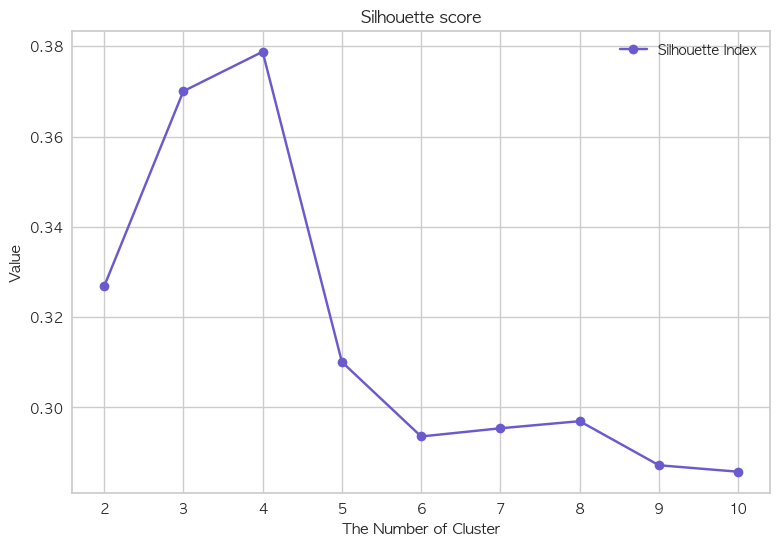

In [3057]:
# Silhouette score

cluster_num_candidates = range(2,11)
silhouette_list = []
for k in cluster_num_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    pred = kmeans.fit_predict(scaled)
    silhouette_list.append(np.mean(silhouette_samples(scaled, pred, metric='euclidean')))
    
    
fig = plt.figure(figsize=(9,6))
fig.set_facecolor('white')
 
plt.plot(cluster_num_candidates, silhouette_list, marker='o', label='Silhouette Index', color='slateblue')
 
plt.legend()
plt.title('Silhouette score')
plt.xlabel('The Number of Cluster')
plt.ylabel('Value')
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

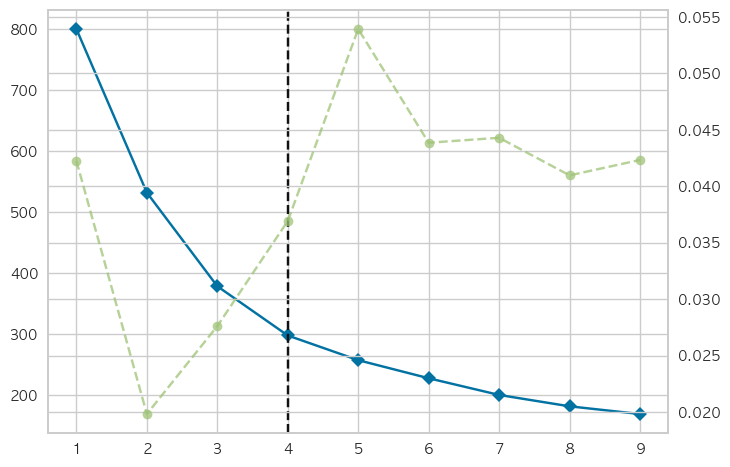

In [3059]:
# Elbow method

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled)

In [3060]:
# 모델 만들기
model = KMeans(n_clusters = 4, init='k-means++')

# 모델 학습
model.fit(scaled)

# 기존 데이터에 클러스터 생성
scaled['cluster'] = model.fit_predict(scaled)

In [3061]:
# 시각화를 위한 PCA 진행

pca = PCA(n_components = 2)
pca.fit(scaled.iloc[:,:-1])
data = pd.DataFrame(data = pca.transform(scaled.iloc[:,:-1]), columns=['pc1', 'pc2'])
data.index = scaled.index
data['cluster'] = scaled['cluster']

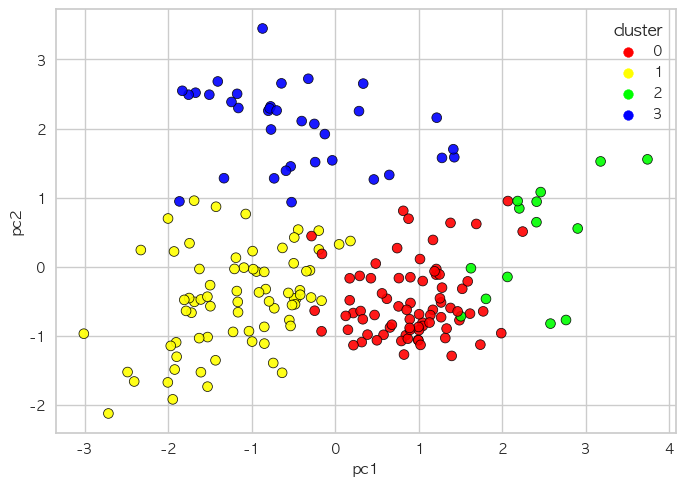

In [3141]:
# scatter plot으로 cluster 확인

sns.scatterplot(x='pc1', y='pc2', alpha=0.9,edgecolor='black', hue='cluster', data=data, palette=['red', 'yellow', 'lime','blue'])
plt.show()

In [3017]:
# feature importance

from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(
	n_clusters=4,
	ordered_feature_names=scaled.columns[:-1].tolist(), 
	feature_importance_method='wcss_min', # or 'unsup2sup' 'wcss_min'
).fit(scaled.iloc[:,:-1])

kms.feature_importances_[0]

[('live', 0.865528378712001),
 ('edu', 0.8541086749938313),
 ('city', 0.462519863228502),
 ('wealth', 0.23743878370578267)]

In [3018]:
# 클러스터 별 데이터 개수 확인

scaled.groupby('cluster').size()

cluster
0    14
1    74
2    77
3    35
dtype: int64

In [2270]:
# 클러스터별 행정구역 리스트로 저장

scl_lst = []
for i in range(4):
    scl_lst.append(list(scaled[scaled['cluster']==i].index))

In [2102]:
scl_lst

[['송파구_위례동',
  '구로구_항동',
  '송파구_잠실2동',
  '강동구_고덕1동',
  '서대문구_남가좌1동',
  '강동구_상일1동',
  '송파구_잠실4동',
  '양천구_목1동',
  '성북구_길음1동',
  '노원구_중계1동',
  '양천구_목5동',
  '광진구_광장동',
  '강동구_고덕2동',
  '송파구_가락1동',
  '은평구_응암2동',
  '강동구_암사3동',
  '양천구_신정1동',
  '양천구_신정6동',
  '강동구_상일2동',
  '마포구_용강동',
  '강동구_강일동',
  '강북구_삼각산동',
  '영등포구_신길7동',
  '양천구_신월6동',
  '강남구_세곡동',
  '강서구_염창동',
  '송파구_잠실3동',
  '강서구_공항동',
  '성북구_장위3동',
  '영등포구_문래동',
  '강서구_발산1동',
  '구로구_신도림동',
  '노원구_중계본동',
  '마포구_아현동',
  '강서구_우장산동',
  '노원구_상계8동',
  '은평구_진관동',
  '송파구_오륜동',
  '마포구_상암동',
  '양천구_신정2동',
  '강서구_방화1동',
  '성북구_길음2동',
  '서초구_양재1동',
  '성북구_돈암2동',
  '구로구_구로1동',
  '강동구_명일2동',
  '성동구_옥수동',
  '구로구_오류2동',
  '강동구_명일1동',
  '동대문구_장안2동',
  '영등포구_여의동',
  '서대문구_북가좌1동',
  '서대문구_남가좌2동',
  '성동구_응봉동',
  '동대문구_답십리1동',
  '송파구_가락2동',
  '양천구_신정3동',
  '중랑구_신내1동',
  '노원구_공릉2동',
  '동작구_상도2동',
  '노원구_하계2동',
  '송파구_송파2동',
  '강동구_암사2동',
  '광진구_자양3동',
  '서대문구_북아현동',
  '양천구_신정7동',
  '성북구_정릉1동',
  '양천구_신월4동',
  '성북구_월곡1동',
  '동작구_사당3동',
  '강서구_가양1동',
  '관악구_삼성동',

In [3021]:
# 확인 

kids_rev['cluster'] = scaled['cluster']

kids_rev[kids_rev['cluster']==2]

,kids,policy,live,life,wealth,city,edu,safe,foreign,cluster
행정구역,,,,,,,,,,
마포구_염리동,0.535410,0.411497,0.504042,0.314564,0.391668,0.231492,0.454977,0.562654,0.131070,2
중랑구_면목5동,0.470130,0.496776,0.512776,0.243779,0.097396,0.217442,0.399101,0.769561,0.019770,2
관악구_보라매동,0.225215,0.058072,0.222645,0.011354,0.127315,0.201563,0.458925,0.421932,0.045522,2
성북구_장위2동,0.225108,0.243957,0.230872,0.368119,0.191485,0.418393,0.403377,0.925419,0.043647,2
금천구_독산2동,0.224982,0.166579,0.143569,0.090796,0.110700,0.284864,0.518448,0.936625,0.181683,2
...,...,...,...,...,...,...,...,...,...,...
관악구_중앙동,0.087173,0.058072,0.177364,0.011354,0.127315,0.376393,0.508980,0.421932,0.060738,2
금천구_가산동,0.081422,0.166579,0.319034,0.090796,0.121269,0.278915,0.368782,0.936625,0.236261,2
구로구_가리봉동,0.081213,0.264829,0.104099,0.459407,0.098267,0.568970,0.422030,0.704108,0.787427,2


In [2959]:
kids_rev

,kids,policy,live,life,wealth,city,edu,safe,foreign,cluster
행정구역,,,,,,,,,,
송파구_위례동,1.000000,0.483804,1.000000,0.634178,0.419510,0.102772,0.959900,0.381473,0.005858,3
구로구_항동,0.884494,0.264829,0.887998,0.459407,0.132427,0.000000,0.644617,0.704108,0.021053,0
서초구_반포2동,0.869103,0.679419,0.955424,0.587819,0.862146,0.065161,0.338026,0.297624,0.014740,1
송파구_잠실2동,0.807119,0.483804,0.954282,0.634178,0.527806,0.037977,0.538080,0.381473,0.006759,3
강동구_고덕1동,0.806754,0.365606,0.832287,0.475371,0.319857,0.090165,0.460856,0.635157,0.009689,0
...,...,...,...,...,...,...,...,...,...,...
용산구_남영동,0.079722,0.089596,0.189811,0.000000,0.681506,0.437534,0.239863,0.685598,0.158569,2
동작구_노량진2동,0.078376,0.395000,0.060595,0.332859,0.286536,0.408889,0.143182,0.937797,0.168531,2
중구_을지로동,0.071048,0.068027,0.356035,0.235223,0.347265,0.836230,0.000000,1.000000,0.350589,2


In [1898]:
c0 = kids_rev[kids_rev['cluster']==1]

In [1899]:
c0 = c0.drop(['kids', 'cluster'], axis=1)

In [1900]:
scaler = StandardScaler()

scaler.fit(c0)
scaled = scaler.transform(c0)
scaled = pd.DataFrame(scaled, columns= c0.columns, index=c0.index)

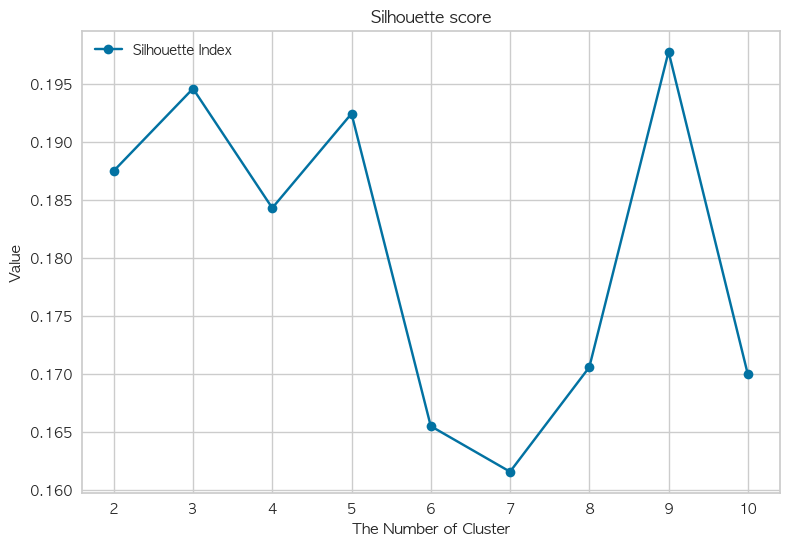

In [1901]:
# Silhouette score

cluster_num_candidates = range(2,11)
silhouette_list = []
for k in cluster_num_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    pred = kmeans.fit_predict(scaled)
    silhouette_list.append(np.mean(silhouette_samples(scaled, pred, metric='euclidean')))
    
    
fig = plt.figure(figsize=(9,6))
fig.set_facecolor('white')
 
plt.plot(cluster_num_candidates, silhouette_list, marker='o', label='Silhouette Index')
 
plt.legend()
plt.title('Silhouette score')
plt.xlabel('The Number of Cluster')
plt.ylabel('Value')
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

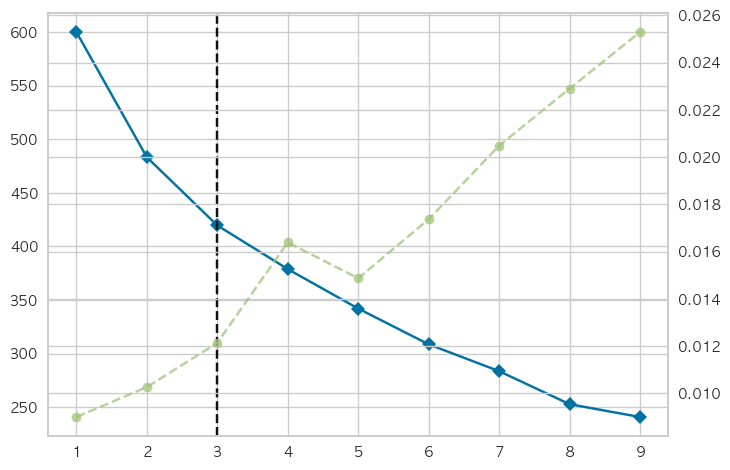

In [1902]:
# Elbow method

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled)

In [1903]:
# 모델 만들기
model = KMeans(n_clusters = 4, init='k-means++')

# 모델 학습
model.fit(scaled)

# 기존 데이터에 클러스터 생성
scaled['cluster'] = model.fit_predict(scaled)

In [1904]:
# 시각화를 위한 PCA 진행

pca = PCA(n_components = 2)
pca.fit(scaled.iloc[:,:-1])
data = pd.DataFrame(data = pca.transform(scaled.iloc[:,:-1]), columns=['pc1', 'pc2'])
data.index = scaled.index
data['cluster'] = scaled['cluster']

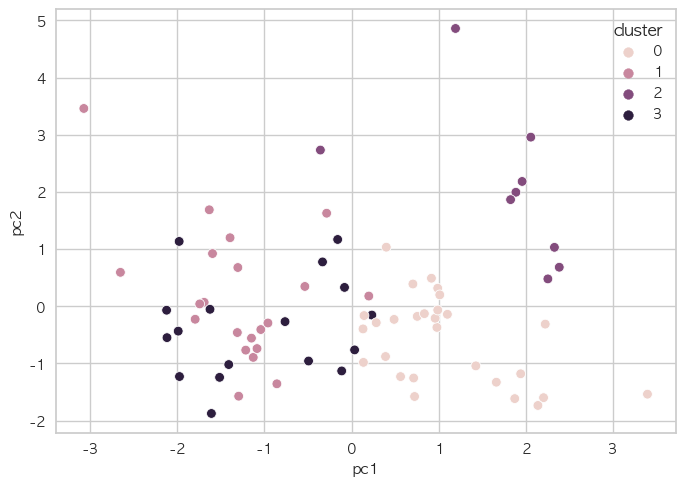

In [1905]:
# scatter plot으로 cluster 확인

sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=data)
plt.show()

In [1906]:
# feature importance

from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(
	n_clusters=3,
	ordered_feature_names=scaled.columns[:-1].tolist(), 
	feature_importance_method='wcss_min', # or 'unsup2sup'
).fit(scaled.iloc[:,:-1])

kms.feature_importances_[0]

[('safe', 1.8694209007999552),
 ('life', 1.630014753119171),
 ('live', 0.8615017843739928),
 ('policy', 0.8348434002699752),
 ('wealth', 0.7069086570548964),
 ('city', 0.3313979232084913),
 ('foreign', 0.14795622581651996),
 ('edu', 0.11238039749599109)]

In [1907]:
c0['cluster'] = scaled['cluster']

c0[c0['cluster']==1]

,policy,live,life,wealth,city,edu,safe,foreign,cluster
행정구역,,,,,,,,,
구로구_항동,0.264829,0.887998,0.2,0.132427,0.000000,0.644617,0.817583,0.021053,1
노원구_중계1동,0.176440,0.947892,0.0,0.178898,0.157041,0.401795,0.212223,0.007777,1
광진구_광장동,0.144425,0.827501,0.0,0.288605,0.020132,0.602926,0.578399,0.012841,1
은평구_응암2동,0.258447,0.779837,0.5,0.126790,0.224907,0.627824,0.723954,0.015703,1
강북구_삼각산동,0.061409,0.955015,0.2,0.087166,0.130849,0.746095,0.462837,0.007134,1
구로구_신도림동,0.264829,0.839352,0.2,0.238108,0.201554,0.748160,0.817583,0.021245,1
노원구_중계본동,0.176440,0.816862,0.0,0.178898,0.053206,0.362204,0.212223,0.003846,1
노원구_상계8동,0.176440,0.964568,0.0,0.164371,0.208687,0.782530,0.212223,0.003919,1
은평구_진관동,0.258447,0.842933,0.5,0.160409,0.037633,0.992126,0.723954,0.008068,1


In [1908]:
c1 = kids_rev[kids_rev['cluster']==1]